In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

iris = datasets.load_iris()

print('아이리스 종류 :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginica]')
print('데어터 수 :', len(iris.data))
print('데이터 열 이름 :', iris.feature_names)
data = pd.DataFrame( { 'sepal length': iris.data[:, 0],
                       'sepal width': iris.data[:, 1],
                       'petal length': iris.data[:, 2],
                       'petal width': iris.data[:, 3],
                       'species': iris.target
                     }
)
data.head()


아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데어터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [3]:
# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     sepal length  sepal width  petal length  petal width
60            5.0          2.0           3.5          1.0
116           6.5          3.0           5.5          1.8
144           6.7          3.3           5.7          2.5
119           6.0          2.2           5.0          1.5
108           6.7          2.5           5.8          1.8
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[105 rows x 4 columns]
     sepal length  sepal width  petal length  petal width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3    

# sklearn.ensemble RandomForestClassifier Parameters
- criterion: gini, entropy.  default= gini
 - gini는 entropy보다 연산속도는 빠르나 한쪽으로 편향된결과를 낼 수 있다.
 - entropy는 gini에 비해 조금 더 균형 잡힌 model을 만들 수 있다.
- n_estimators: 결정트리의 개숫를 지정. default=100
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수, deaurlt='auto'
- max_depth: Decision Tree의 최대 깊이 제한. default=None. 클수록 정확(과대적합), 작을수록 가지치기(과대적합 방지)
- min_samples_split: 노드에서 가지를 분리할 때 필요한 최소 sample개수에 대한 제한. default=2 클수록 가지치기(과적방지)작을수록(과적)
- min_samples_leaf: 한 노드에서 가지고 있어야 할 최소 sample개수에 대한 제한. default=1.클수록 가지칙(과적방지) 작을수록 정확하게(과적)
 - int일 경우, 주어진 값을 그대로 사용.
 - float일 경우, 0~1 사이의 값을 줄 수 있으며 cell(전체 데이터 수*min_samples_leaf)의 값 사용
- max_features: 최상의 분할을 찾기위한 feature수. default=None
 - int일 경우, 주어진 값 그대로 사용
 - float일 경우, int(max_features * 총 변수 개수) 사용
 - None일 경우, 총 변수 개수를 사용한다
- max_leaf_nodes: int or None, optional( default=None). 최대 몇개 잎 노드가 만들어 질때 까지 split(하위(앞)노드로 분리) 할 것이냐를 결정한다. 클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.
- min_impurity_decrease: 분할로 얻어질 분수도 감소량 지정
- min_impurity_split: 분할 대상이 되기 위해 필요한 최소한으이 불순도 지정
- min_weight_fraction_leaf: min_samples_leaf와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율
- splitter: 각 노드에서 분할을 선택하는데 사용되는 전략(default:best)
- class_weight: 클래스 가중치
- presort: 데이터 정렬 필요 여부
- bootstrap: 부트스트랩(중복허용 샘플링) 사용여부
- oob_score: 일반화 정확도를 줄이기 위해 밖의 샘플 사용여부, true로 하면 훈련종료후 oob샘들을 기반으로 평가를 수행
- worm_start: 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
- class_weight: 클래스 가중치

In [4]:
# 학습 진행
# n_estimators : 의사결정트리 개수(T)를 의미. default는 10
forest = RandomForestClassifier(n_estimators=100)
forest

RandomForestClassifier()

In [5]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
print(f"정확도 : {metrics.accuracy_score(y_test, y_pred)}")

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0]
정확도 : 0.9777777777777777


In [7]:
# 성능 평가 확인
# 분류 예측 모듈의 평가에는 Accuracy뿐만 아니라 Precision, Recall도 많이 사용된다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index = x_train.columns)
feature_top4 = feature_importances.sort_values(ascending=False)[:4]

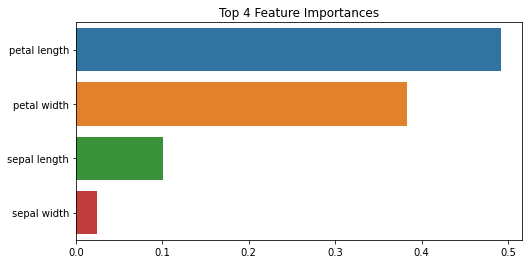

In [11]:
plt.figure(figsize=(8,4))
plt.title('Top 4 Feature Importances')
sns.barplot(x=feature_top4, y=feature_top4.index)
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators":[10, 20, 30, 40, 50, 60, 65, 70, 75],
          "max_depth":[2, 3, 4, 5, 6, None],         
          "max_features":[2, 3, 4],
        }

model = RandomForestClassifier()
# cv = KFold
gs = GridSearchCV(model,       # estimator
                  param_grid=params,
                  cv= 2,
                  scoring=None, n_jobs=-1,refit=True)
gs.fit(x_train, y_train)

model = gs.best_estimator_
print("train_score : {} ".format(model.score(x_train, y_train)))
print("test_score : {} ".format(model.score(x_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)

train_score : 1.0 
test_score : 0.9777777777777777 
0.961901306240929
{'max_depth': 6, 'max_features': 4, 'n_estimators': 65}


# 유방암 데이터 사용

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

In [25]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
print(f"훈련 세트 정확도: {forest.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {forest.score(X_test, y_test):.3f}")
print(f"특성 중요도:\n{forest.feature_importances_}")


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
특성 중요도:
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


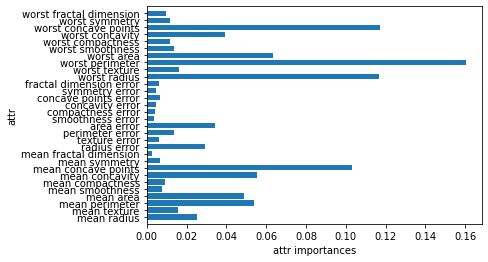

In [37]:
# 특성 중요도 시각화
n_features = cancer.data.shape[1]
#plt.figure(figsize=(8, 5))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()

# 독버섯 예제

In [38]:
mr = pd.read_csv("./mushrooms.csv")
mr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [51]:
print(mr.columns.values)

['class' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


In [59]:
# 
print(f"class: {mr['class'].unique()}")
print(f"cap-shape: {mr['cap-shape'].unique()}")
print(f"cap-surface: {mr['cap-surface'].unique()}")
print(f"cap-color: {mr['cap-color'].unique()}")
print(f"bruises: {mr['bruises'].unique()}")
print(f"odor: {mr['odor'].unique()}")
print(f"gill-attachment: {mr['gill-attachment'].unique()}")
print(f"gill-spacing: {mr['gill-spacing'].unique()}")


class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']


In [58]:
mr1 = mr[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises']]
mr1

,class,cap-shape,cap-surface,cap-color,bruises
0,p,x,s,n,t
1,e,x,s,y,t
2,e,b,s,w,t
3,p,x,y,w,t
4,e,x,s,g,f
...,...,...,...,...,...
8119,e,k,s,n,f
8120,e,x,s,n,f
8121,e,f,s,n,f
8122,p,k,y,n,f


In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# e:0 p:1
mr1['class'] = le.fit_transform(mr1['class'])
mr1.head()

c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,class,cap-shape,cap-surface,cap-color,bruises
0,1,x,s,n,t
1,0,x,s,y,t
2,0,b,s,w,t
3,1,x,y,w,t
4,0,x,s,g,f


In [63]:
mr_d = pd.get_dummies(mr1)
mr_d.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t
0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mr_d.iloc[:, 1:], mr_d.iloc[:, :1]) #, random_state=0

In [65]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=0)

In [66]:
print(f"훈련 세트 정확도: {forest.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {forest.score(X_test, y_test):.3f}")
print(f"특성 중요도:\n{forest.feature_importances_}")


훈련 세트 정확도: 0.898
테스트 세트 정확도: 0.886
특성 중요도:
[0.0376707  0.00046004 0.01878261 0.02175821 0.00506817 0.01197922
 0.05275858 0.00101557 0.08158891 0.06913288 0.02069732 0.00498267
 0.05104319 0.04326735 0.03859048 0.01491385 0.00638506 0.00820571
 0.07596284 0.05509927 0.20922576 0.17141159]


In [87]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators":[20, 30, 40, 50, 60, 70, 80],
          "max_depth":[7, 8, 9, 10, 11, 12, 13, None],         
          "max_features":[7, 8, 9, 10, 11, 12, 13],
        }

model = RandomForestClassifier()
# cv = KFold
gs = GridSearchCV(model,       # estimator
                  param_grid=params,
                  cv= 2,
                  scoring=None, n_jobs=-1,refit=True)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)

train_score : 0.8974232726079108 
test_score : 0.8877400295420975 
0.8967674521789405
{'max_depth': 8, 'max_features': 7, 'n_estimators': 30}


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


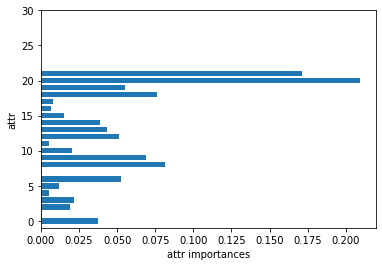

In [80]:
# 특성 중요도 시각화
n_features = cancer.data.shape[1]
#plt.figure(figsize=(8, 5))
plt.barh(range(len(mr_d.columns)-1), forest.feature_importances_, align='center')
#plt.yticks(np.arange(n_features), mr_d.columns.values)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()

In [97]:
import pandas as pd

dataset = pd.read_csv('mushroom.csv', na_values=['?'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [98]:
dataset.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [99]:
dataset = dataset.drop("stalk-root", axis=1) # inplace=True 결측데이터 컬럼 삭제

In [100]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [101]:
# 데이터와 타겟 분리
x = dataset.drop('class', axis=1)
y = dataset['class']

In [102]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [103]:
# 타겟 레이블 인코딩,,, 
Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [107]:
Encoder_x = LabelEncoder()
#Encoder_x.fit_transform(x)
#aa = Encoder_x.fit_transform(x[:,:])

df = pd.DataFrame()
for col in x.columns:
    df[col] = Encoder_x.fit_transform(x[col])
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [110]:
model = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
score

1.0

In [112]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [114]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators":[20, 30, 40, 50, 60, 70, 80],
          "max_depth":[3, 4, 5, 6, 7, 8, 9, 10, None],         
          "max_features":[3, 4, 5, 6, 7, 8, 9, 10],
        }

model = RandomForestClassifier()
# cv = KFold
gs = GridSearchCV(model,       # estimator
                  param_grid=params,
                  cv= 2,
                  scoring=None, n_jobs=-1,refit=True)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)

train_score : 0.9961308476960957 
test_score : 0.9958982772764561 
1.0
{'max_depth': 7, 'max_features': 7, 'n_estimators': 20}
